In [9]:
# automatically reload dependant notebooks
%load_ext autoreload
%autoreload 2
import import_ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tests of All-Pairs Shortest Path Algorithms

This notebook contains tests for the ASP algorithms implemented in the [`asp.ipynb`](./asp.ipynb) notebook.

## test Floyd-Warshall ASP

Let us test `aspFloydWarshall()` against the directed, weighted graph shown in Figure 23.1 p.652.

Floyd-Warshall
  1 None 
    [2,3,5]
  2 None 
    [4,5]
  3 None 
    [2]
  4 None 
    [1,3]
  5 None 
    [4]
  1-2: 3
  1-3: 8
  1-5: -4
  2-4: 1
  2-5: 7
  3-2: 4
  4-1: 2
  4-3: -5
  5-4: 6


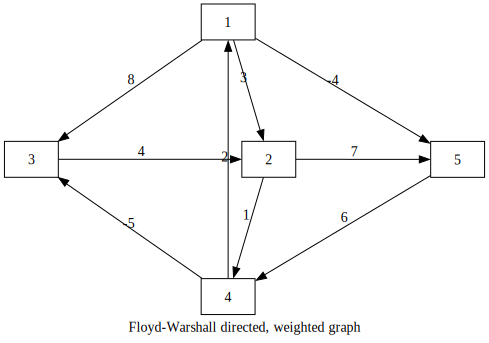

In [10]:
from graph import *
from asp import *

def makeFWAG() -> ASPGraph:
  vt = ["1", "2", "3", "4", "5"]
  et = [  # directed edges
    "1-2", "1-3", "1-5",
    "2-4", "2-5",
    "3-2",
    "4-1", "4-3",
    "5-4", ]
  ew = {
    "1-2": 3, "1-3": 8, "1-5": -4,
    "2-4": 1, "2-5": 7,
    "3-2": 4,
    "4-1": 2, "4-3": -5,
    "5-4": 6, }
  g = ASPGraph("Floyd-Warshall")
  g.makeVEw(vt, et, ew)
  return g

fwag = makeFWAG()
print(fwag)
draw(fwag, directed=True, label=f"{fwag.tag} directed, weighted graph")

Next, we apply `aspFloydWarshall()` to the graph to extract the ASP. `aspFloydWarshall()` returns an $nxn$ weight matrix, which we simply print in tabular form.

In [11]:
fwagdd, fwagpp = aspFloydWarshall(fwag)
print(f"{fwag.tag}\n  all-pairs shortest paths")
for i in range(0, len(fwagdd)): print(f"    {fwagdd[i]}")
print("  predecessor subgraph")
for i in range(0, len(fwagpp)): print(f"    {list(map(lambda x: x + 1, fwagpp[i]))}")  # +1 to offset zero-based indices

Floyd-Warshall
  all-pairs shortest paths
    [0, 1, -3, 2, -4]
    [3, 0, -4, 1, -1]
    [7, 4, 0, 5, 3]
    [2, -1, -5, 0, -2]
    [8, 5, 1, 6, 0]
  predecessor subgraph
    [-9223372036854775806, 3, 4, 5, 1]
    [4, -9223372036854775806, 4, 2, 1]
    [4, 3, -9223372036854775806, 2, 1]
    [4, 3, 4, -9223372036854775806, 1]
    [4, 3, 4, 5, -9223372036854775806]
